# Daily Meditation in 2020

I meditated every day in 2020, here's what the data looks like.

In [58]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

sns.set(font="Verdana")
sns.set_style("white")

In [59]:
week_dict = {
    1: '1. Mon', 2:'2. Tue', 3:'3. Wed', 4:'4. Thu', 5:'5. Fri', 6:'6. Sat', 7:'7. Sun'
}

df = pd.read_csv('meditation.csv')

df['date'] = pd.to_datetime(df['date'])
df['year'], df['Week Number'], df['Day Number'] = zip(*df['date'].map(lambda x: date.isocalendar(x)))
df['Week Day'] = df['Day Number'].apply(lambda x: week_dict[x])

df['Month Number'] = df['date'].apply(lambda x: x.month)
df['Month'] = df['date'].apply(lambda x: x.month_name())

df['duration'] = df['duration'].astype(int)

df.head()

,date,duration,year,Week Number,Day Number,Week Day,Month Number,Month
0,2020-01-01,452,2020,1,3,3. Wed,1,January
1,2020-01-02,520,2020,1,4,4. Thu,1,January
2,2020-01-03,409,2020,1,5,5. Fri,1,January
3,2020-01-04,477,2020,1,6,6. Sat,1,January
4,2020-01-05,408,2020,1,7,7. Sun,1,January


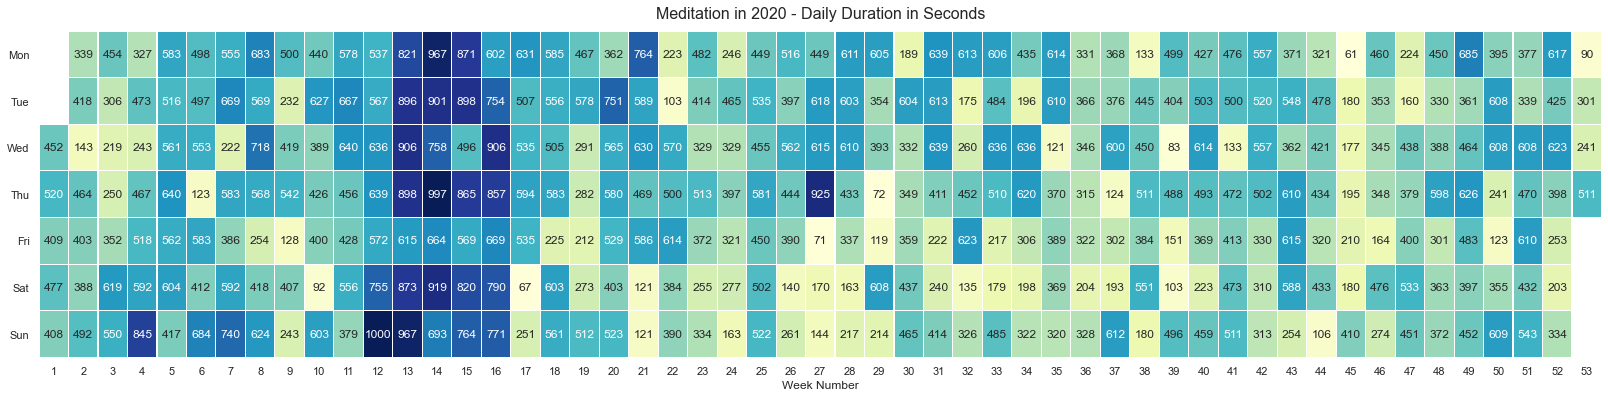

In [60]:
plt_data = df.pivot('Week Day', 'Week Number', 'duration')
plt_data.index = [x[3:] for x in plt_data.index]

plt.figure(figsize=(28, 6))
sns.heatmap(
    plt_data, annot=True, linewidths=.1, fmt='.0f', cbar=False,
    cmap='YlGnBu'
)
plt.yticks(rotation=0)
plt.title('Meditation in 2020 - Daily Duration in Seconds', fontsize=16, y=1.02);

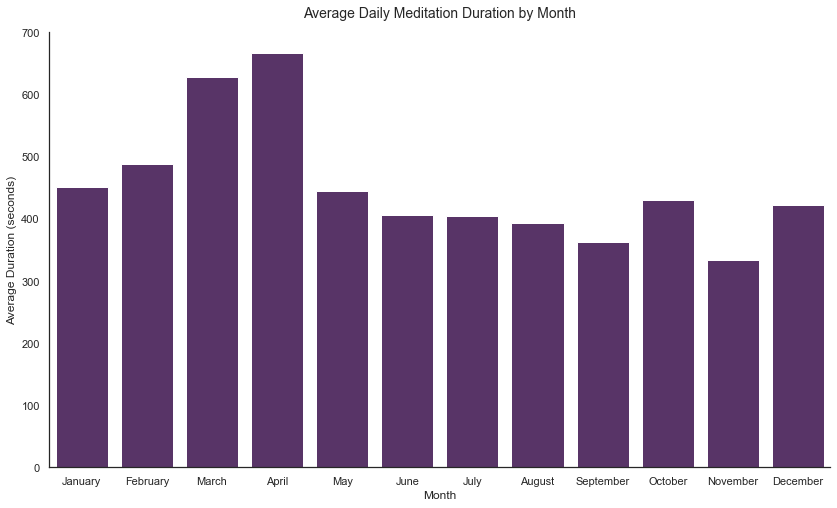

In [66]:
monthly_df = df.groupby(['Month Number', 'Month']).agg({'duration': ['count', 'sum']}).reset_index()
monthly_df['Average Duration'] = monthly_df['duration']['sum'] / monthly_df['duration']['count']

monthly_df['Average Duration (mins)'] = monthly_df['Average Duration'].apply(
    lambda x: str(datetime.timedelta(seconds=x))
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=monthly_df,
    x='Month',
    y='Average Duration',
    color='#5B2C6F'
);
sns.despine()
plt.title('Average Daily Meditation Duration by Month', fontsize=14, y=1.02)
plt.ylabel('Average Duration (seconds)');